In the below there are presented several approaches to the linear regression task, starting from the scratch and ending with more signifincant and powerful tools:

- calculated by a formula
- using np.polyfit
- using np.linalg least square
- using sklearn.linear_model.LinearRegression model
- using scipy.stats.linregress
- using statsmodels.api.sm model

Basically, they all calculate coefficients for the fitted line which ones connect with the linear regression task, however, some of them have much more functionalities. Being precise, the most basic techniques return only coefficients for the predicted line, based on given points.
In the 2D case everything can be easily visualised but each method can be automatically moved into higher dimensions. 

Regarding the methods, calculating by formula is probably not the best choice to use in project, generally, nevertheless I think it's good to know how the fititng task looks like and being able to write it from the scrath. 

Additional functionaliy of polyfit from numpy, is that it's able to fit the n-dimensional polynomial for the given data.

Last four approaches are definitely more significant (with statsmodels library in the top, in my opinion), they can also retrun residuals, p/r_values, residuals etc. In general, they are recommended if one wants to process more advance linear regression model, with veryfing statistical assumptions, that guarantee the models works properly.

In [295]:
import random
import numpy as np
from scipy import stats
import numpy.linalg as alg
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [629]:
class data:
    
    
    ### GENERATING POINTS ###
    
    def __init__(self, sample_size, random_seed=None):
        self.size = sample_size       
        X, y = [], []   ### empty lists
        for i in range(sample_size):
            a = random.uniform(i, i+20)  ### feeding X, y with random points
            b = random.uniform(i, i+50)  ### feeding X, y with random points
            X.append(a)
            y.append(b)
        self.X = np.array(X)  ### return X-array
        self.y = np.array(y)  ### return y-array
    
    
    ### PLOTS ###
    
    def plot(self, arg1, arg2, col, plot_exists=False, legend=None):
        if plot_exists==False:
            plt.figure(figsize=(14,6))
            plt.plot(arg1, arg2, col, label=legend)
            if legend is not None:
                plt.legend()
        else:
            plt.plot(arg1, arg2, col, label=legend)
            if legend is not None:
                plt.legend()
    
    
    def train_val_split(self, val_size):
        if val_size > 1 or val_size <= 0:
            raise SyntaxError("Validation size should be a float between 0 and 1")
        perm = list(np.random.permutation(self.X.shape[0]))
        split_index = int(self.X.shape[0] * val_size)
        train_idxs = perm[:split_index]
        test_idxs = perm[split_index:]
        self.X_val = self.X[train_idxs]
        self.y_val = self.y[train_idxs]
        self.X_train = self.X[test_idxs]
        self.y_train = self.y[test_idxs]
    
    ### MODELS ###
       
    def fitted_by_formula(self):
        global ones
        ones = np.ones(len(self.X))   ### array of ones of the length of X
        self.X_1 = np.array([ones, self.X])   ### merging ones and X
        self.beta = alg.inv(self.X_1.dot(self.X_1.T)).dot(self.X_1.dot(self.y.T))   ### calculating beta from the formula (X*X.T)^(-1) * (X*y.T)
        self.y_by_formula = self.beta[1]*self.X + self.beta[0]   ### estimating a line from a formula y = ax + b
        
    def polyfit(self, arg1, arg2):
        self.beta_polyfit = np.polyfit(arg1, arg2, 1)
        self.y_polyfit = self.beta_polyfit[0] * arg1 + self.beta_polyfit[1]    
    
    def lstsq(self):
        self._1_X = np.vstack([self.X, ones]).T
        params = np.linalg.lstsq(self._1_X, self.y, rcond=None)
        self.beta_lstsq = params[0]
        self.residuals = params[1]
        self.singulars = params[3]
        self.y_lstsq = self.beta_lstsq[0]*self.X + self.beta_lstsq[1]
        
    def lin_reg_model(self, arg1, arg2, test):
        self.lin_reg_mod = LinearRegression().fit(arg1.reshape(-1, 1), arg2.reshape(-1, 1))
        self.y_model_predict = self.lin_reg_mod.predict(test.reshape(-1, 1))
        
        
    def scipy_stats(self):
        self.slope, self.intercept, self.r_value, self.p_value, self.std_err = stats.linregress(self.X, self.y)
        self.y_scipy = self.slope*self.X + self.intercept
        
    def sm(self):
        self.sm_model = sm.OLS(self.y, sm.add_constant(self.X)).fit()
        self.beta_sm = self.sm_model.params
        self.y_sm = self.beta_sm[1]*self.X + self.beta_sm[0]
        self.summary = self.sm_model.summary()

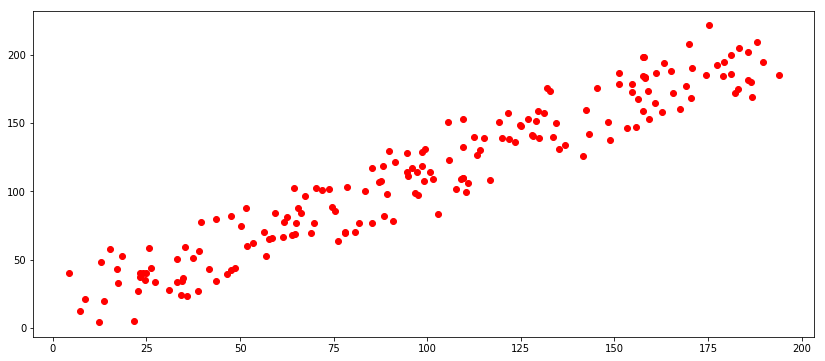

In [632]:
points = data(180)
points.plot(points.X, points.y, 'ro')

In [633]:
points.fitted_by_formula()
print("Calculated fitted line is equal to: y =", np.round(points.beta[1], 2), "* x  + ", np.round(points.beta[0], 2))

Calculated fitted line is equal to: y = 0.99 * x  +  13.84


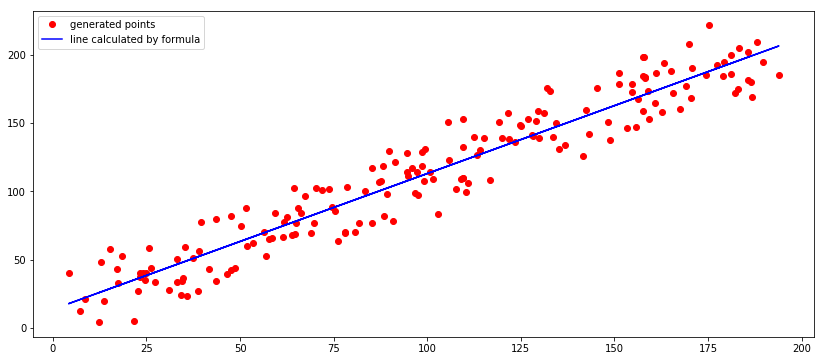

In [634]:
points.plot(points.X, points.y, 'ro', legend='generated points')
points.plot(points.X, points.y_by_formula, 'b', plot_exists=True, legend="line calculated by formula")

In [635]:
points.polyfit(points.X, points.y)
print("Fitted line returned by np.polyfit is equal to: y =", np.round(points.beta_polyfit[0], 2), "* x  + ", np.round(points.beta_polyfit[1], 2))

Fitted line returned by np.polyfit is equal to: y = 0.99 * x  +  13.84


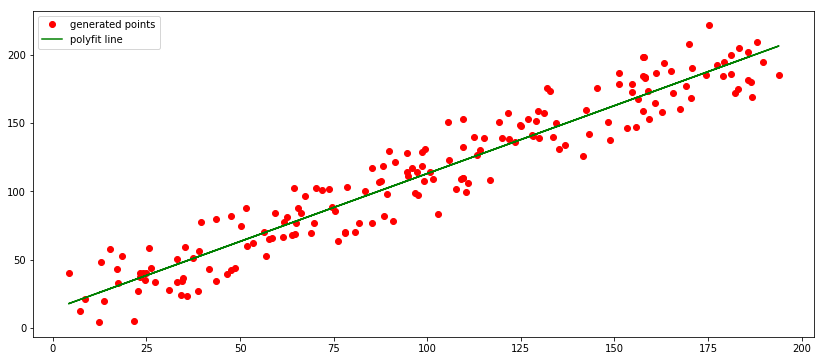

In [636]:
points.plot(points.X, points.y, 'ro', legend='generated points')
points.plot(points.X, points.y_polyfit, 'g', plot_exists=True, legend="polyfit line")

As we can see both lines look equal to each other. No suprise here, but as mentioned earlier, np.polyfit might return higher dimensional fitted polynomials, if requested. Next, the sub-library for linear algebra from numpy with its least square functionality (linalg.lstsq). It returns not only coefficients for the fitted hyperplane, but also can return residulas (errors)  - important for checking OLS model assumptions. Using it, we can also obtain singular values.

In [637]:
points.lstsq()

In [638]:
print("Fitted line returned by np.linalg.lstsq is equal to: y =", np.round(points.beta_lstsq[0], 2), "* x  + ", np.round(points.beta_lstsq[1], 2))
print("Residuals:", points.residuals)
print("Singular values:", points.singulars)

Fitted line returned by np.linalg.lstsq is equal to: y = 0.99 * x  +  13.84
Residuals: [44263.80062301]
Singular values: [1509.48855967    6.21479321]


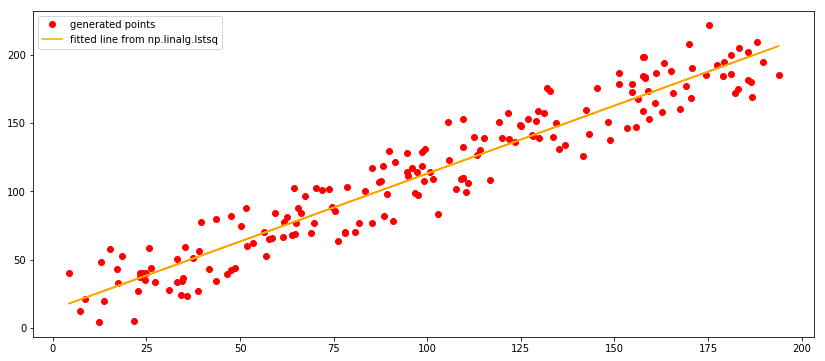

In [639]:
points.plot(points.X, points.y, 'ro', legend='generated points')
points.plot(points.X, points.y_lstsq, 'orange', plot_exists=True, legend="fitted line from np.linalg.lstsq")

The model LinearRegression from sklear library, is commonly used once data is splitted into training, validation and testing sets. As usually in sklearn, model is firstly fitting on training data, then can be evaluate/predict on the validation/test one. model.predict() returns an array with predicted values for all points. In my class lin_reg_model requiers three arguments: x_train, y_train and x_test. If we do not split the data for training and testing, we can put x_test equal to x_train and the model predicts just on the training set.

In [640]:
points.lin_reg_model(points.X, points.y, points.X)
points.y_model_predict

array([[ 26.15712439],
       [ 27.41979723],
       [ 35.47785706],
       [ 30.88223956],
       [ 18.0469825 ],
       [ 26.55217328],
       [ 32.160002  ],
       [ 20.94289954],
       [ 22.29783011],
       [ 37.71760301],
       [ 36.40506013],
       [ 38.26213687],
       [ 29.03418363],
       [ 37.03261553],
       [ 37.05249849],
       [ 31.16324925],
       [ 48.99707702],
       [ 38.44196037],
       [ 49.33705058],
       [ 47.86208412],
       [ 46.65903589],
       [ 46.86862061],
       [ 39.26293706],
       [ 40.98367325],
       [ 51.0916794 ],
       [ 52.44147141],
       [ 39.80797876],
       [ 44.74652757],
       [ 48.13217869],
       [ 59.99129263],
       [ 57.11953947],
       [ 48.45647341],
       [ 61.04445861],
       [ 65.27550993],
       [ 66.95778884],
       [ 52.59918039],
       [ 55.34327946],
       [ 60.94134237],
       [ 61.99748635],
       [ 53.00840307],
       [ 64.9925406 ],
       [ 63.78708706],
       [ 72.67501159],
       [ 57

To split the data we can use train_val_split function from data class.

In [673]:
points.train_val_split(0.15)
print("Length of training set:", len(points.X_train))
print("Length of validation set:", len(points.X_val))

Length of training set: 153
Length of validation set: 27


On the below one can see how the validation set is distributed through the training one.

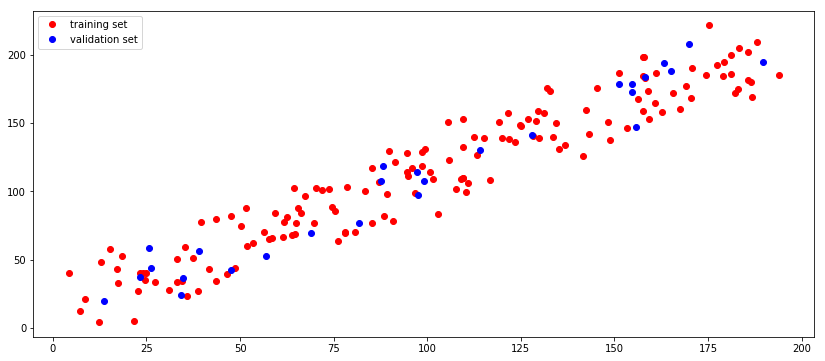

In [674]:
points.plot(points.X_train, points.y_train, 'ro', legend='training set')
points.plot(points.X_val, points.y_val, 'bo', plot_exists=True, legend="validation set")

The model is trained on the training set, but the prediction for the fitted line is done for validation points:

In [675]:
points.lin_reg_model(points.X_train, points.y_train, points.X_val)
len(points.y_model_predict)

27

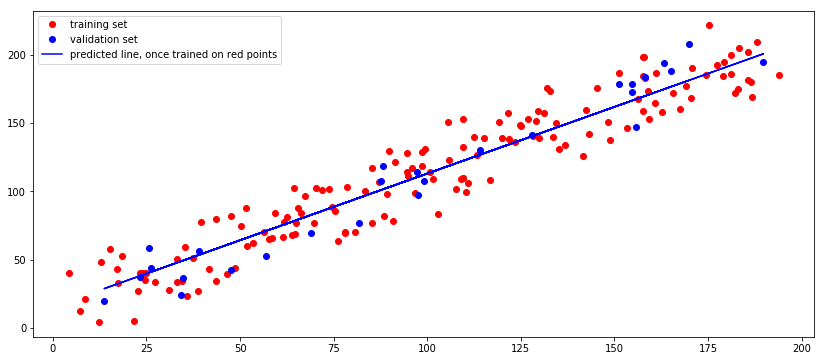

In [676]:
points.plot(points.X_train, points.y_train, 'ro', legend='training set')
points.plot(points.X_val, points.y_val, 'bo', plot_exists=True, legend="validation set")
points.plot(points.X_val, points.y_model_predict, 'b', plot_exists=True, legend="predicted line, once trained on red points")

On the above everythin looks correct, but once the prediction is done using different set that the training one, there are always some discrepancies; we can leave only validation set on the plot, and compare, if the predicted line differs from the one calculated only for the validation set:

In [677]:
points.polyfit(points.X_val, points.y_val)
len(points.y_polyfit)

27

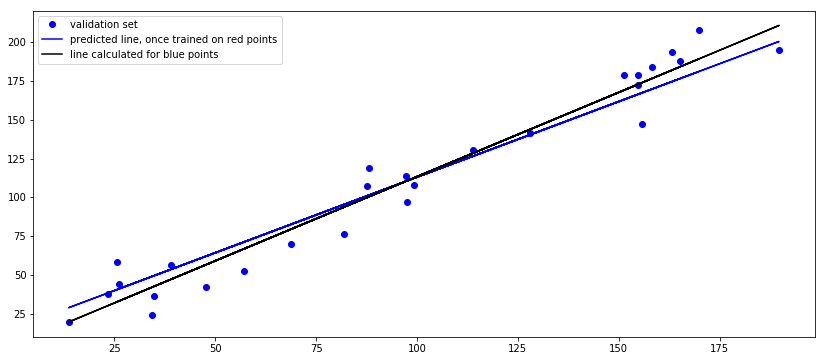

In [678]:
points.plot(points.X_val, points.y_val, 'bo', legend="validation set")
points.plot(points.X_val, points.y_model_predict, 'b', plot_exists=True, legend="predicted line, once trained on red points")
points.plot(points.X_val, points.y_polyfit, 'black', plot_exists=True, legend="line calculated for blue points")

We can easily see that both lines do not match. They are close to each other, but not equal. In such case we can want to measure accuracy for predicted line with the respect to the test (validation) set. Ang again we can use functionality built in the model for that (.score()):

In [679]:
print('Accuracy for the predicted (blue) line:',points.lin_reg_mod.score(points.y_model_predict, points.y_val))
print('Accuracy for the calculated (black) line:',points.lin_reg_mod.score(points.y_polyfit.reshape(-1, 1), points.y_val))

Accuracy for the predicted (blue) line: 0.8962819885364928
Accuracy for the calculated (black) line: 0.9104034859999874


What is interesting there can occur a situation, when the accuracy for line calculated precisely for the test set is worse, than for the model trained on the training set. A lot depends here on the random split of the data. Next model also can return parameters that help to measure accuracy, but not only.

In [680]:
points.scipy_stats()

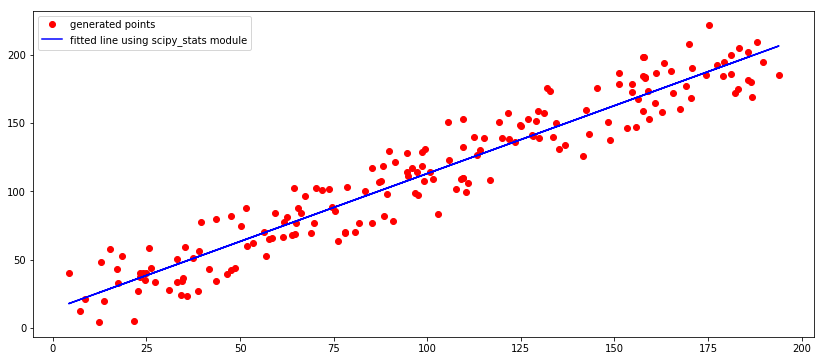

In [685]:
points.plot(points.X, points.y, 'ro', legend='generated points')
points.plot(points.X, points.y_scipy, 'blue', plot_exists=True, legend="fitted line using scipy_stats module")

In [690]:
print("Fitted line returned by scipy_stats is equal to: y =", np.round(points.slope, 2), "* x  + ", np.round(points.intercept, 2))
print("Accuracy (R-squared): %f" % (points.r_value))
print("Standard error: %f" % (points.std_err))

Fitted line returned by scipy_stats is equal to: y = 0.99 * x  +  13.84
Accuracy (R-squared): 0.956978
Standard error: 0.022552


The last, but not least, is the OLS (Ordinary Least Square) model built into statsmodels the library. I think it's most powerful, especially once deeper statistical considerations are required. It contains .summary() functionality that provides most important paramteres and details after training. For fruther analysis lots of statistical tests can be applied using this library:

Slope: 0.992354, intercept: 13.841734



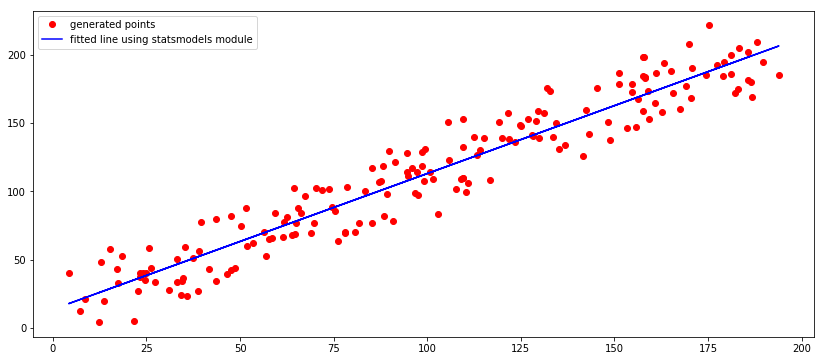

In [699]:
points.sm()
print('Slope: %f, intercept: %f' % (points.beta_sm[1], points.beta_sm[0]))
print()
points.plot(points.X, points.y, 'ro', legend='generated points')
points.plot(points.X, points.y_sm, 'blue', plot_exists=True, legend="fitted line using statsmodels module")

In [700]:
print(points.summary)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     1936.
Date:                Mon, 20 Apr 2020   Prob (F-statistic):           1.40e-97
Time:                        19:04:32   Log-Likelihood:                -750.86
No. Observations:                 180   AIC:                             1506.
Df Residuals:                     178   BIC:                             1512.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.8417      2.537      5.455      0.0

All above models can be used for the linear (poltnomial) regression task, as shown. However, the complexity of each models is quite different. Therefore some of them are able only to return coefficients, and another can be used for deep regression analysis, including the statistical approach, many tests etc. The above has been written to collect several approaches that can be used at least for coefficients' predition in the ordinary least squares regression problem.